In [7]:
import pandas as pd




/home/jessicaye/miniconda3/envs/lectures/lib/python3.13/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [4]:
# Load data
file1 =  "/home/jessicaye/LIFE4138-coursework/GeneExpression/datasets/set_8/A_vs_D.deseq2.results.tsv"



In [5]:
file2 = file_path = "/home/jessicaye/LIFE4138-coursework/GeneExpression/datasets/set_8/A_vs_E.deseq2.results.tsv"


In [8]:
data1 = pd.read_csv(file1, sep="\t")

In [9]:
data2 = pd.read_csv(file2, sep="\t")

In [18]:
# Step 2: Screen for significantly differentially expressed genes


In [11]:
# Set the threshold
pval_threshold = 0.05
logfc_threshold = 1

In [88]:
#A_vs_D
# Screening for up-regulated and down-regulated genes of A_vs_D
upregulated_A_vs_D = data1[(data1['padj'] < pval_threshold) & (data1['log2FoldChange'] > logfc_threshold)]
downregulated_A_vs_D = data1[(data1['padj'] < pval_threshold) & (data1['log2FoldChange'] < -logfc_threshold)]


In [89]:
# Count the number of significantly up-regulated and down-regulated genes
num_upregulated_A_vs_D = len(upregulated_A_vs_D)
num_downregulated_A_vs_D = len(downregulated_A_vs_D)

In [85]:
#Calculate the p-value of A_vs_D and the summary of log2FoldChange
summary_A_vs_D = data1[['padj', 'log2FoldChange']].describe()


# print
print("Statistical summary of A_vs_Dp-value and log2FoldChange:")
print(summary_A_vs_D)

summary_A_vs_D.to_csv('summary_A_vs_D.csv')


A_vs_D p-value 和 log2FoldChange 的统计摘要：
                padj  log2FoldChange
count   6.094000e+03     6397.000000
mean    2.946386e-01       -0.106928
std     3.240703e-01        1.404582
min    1.758279e-206      -25.328550
25%     6.655179e-03       -0.474189
50%     1.493630e-01       -0.001087
75%     5.536747e-01        0.416604
max     1.000000e+00       22.002860


In [ ]:
#A vs E

In [90]:
# Screening for up-regulated and down-regulated genes of A_vs_E
upregulated_A_vs_E = data2[(data2['padj'] < pval_threshold) & (data2['log2FoldChange'] > logfc_threshold)]
downregulated_A_vs_E = data2[(data2['padj'] < pval_threshold) & (data2['log2FoldChange'] < -logfc_threshold)]

In [92]:
# Count the number of significantly up-regulated and down-regulated genes
num_upregulated_A_vs_E = len(upregulated_A_vs_E)
num_downregulated_A_vs_E = len(downregulated_A_vs_E)

In [ ]:
# 创建一个新的数据框来存储结果
summary_df = pd.DataFrame({
    'Comparison': ['A_vs_D', 'A_vs_D', 'A_vs_E', 'A_vs_E'],
    'Regulation': ['Upregulated', 'Downregulated', 'Upregulated', 'Downregulated'],
    'Gene Count': [num_upregulated_A_vs_D, num_downregulated_A_vs_D, num_upregulated_A_vs_E, num_downregulated_A_vs_E]
})

# 保存到 CSV 文件
summary_df.to_csv('gene_count_summary.csv', index=False)

In [100]:
# Screening for significant up-regulated and down-regulated genes of A_vs_D
upregulated_A_vs_D = data1[(data1['padj'] < pval_threshold) & (data1['log2FoldChange'] > logfc_threshold)]
downregulated_A_vs_D = data1[(data1['padj'] < pval_threshold) & (data1['log2FoldChange'] < -logfc_threshold)]

# Screening for significant up-regulated and down-regulated genes of A_vs_E
upregulated_A_vs_E = data2[(data2['padj'] < pval_threshold) & (data2['log2FoldChange'] > logfc_threshold)]
downregulated_A_vs_E = data2[(data2['padj'] < pval_threshold) & (data2['log2FoldChange'] < -logfc_threshold)]

# Add the 'pvalue' column
upregulated_A_vs_D_list = upregulated_A_vs_D[['gene_id', 'log2FoldChange', 'pvalue', 'padj']]
downregulated_A_vs_D_list = downregulated_A_vs_D[['gene_id', 'log2FoldChange', 'pvalue', 'padj']]
upregulated_A_vs_E_list = upregulated_A_vs_E[['gene_id', 'log2FoldChange', 'pvalue', 'padj']]
downregulated_A_vs_E_list = downregulated_A_vs_E[['gene_id', 'log2FoldChange', 'pvalue', 'padj']]

# Add the 'Comparison' column
upregulated_A_vs_D_list['Comparison'] = 'A_vs_D'
downregulated_A_vs_D_list['Comparison'] = 'A_vs_D'
upregulated_A_vs_E_list['Comparison'] = 'A_vs_E'
downregulated_A_vs_E_list['Comparison'] = 'A_vs_E'

# Merge all significant genes
significant_genes = pd.concat([upregulated_A_vs_D_list, downregulated_A_vs_D_list, 
                               upregulated_A_vs_E_list, downregulated_A_vs_E_list])

# save
significant_genes.to_csv('significant_genes.csv', index=False)


/tmp/ipykernel_2043/3740286694.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upregulated_A_vs_D_list['Comparison'] = 'A_vs_D'
/tmp/ipykernel_2043/3740286694.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downregulated_A_vs_D_list['Comparison'] = 'A_vs_D'
/tmp/ipykernel_2043/3740286694.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
# Step 3: Map the Volcano Plot

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Set the drawing size
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

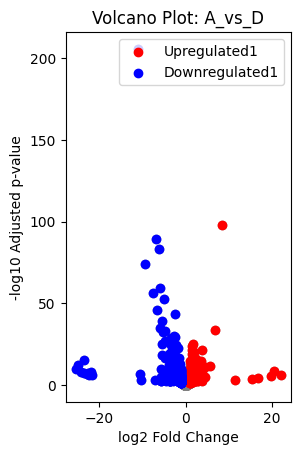

In [43]:
# A_vs_D
plt.subplot(1, 2, 1)
plt.scatter(data1['log2FoldChange'], -np.log10(data1['padj']), color='gray', alpha=0.7)
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.title('Volcano Plot: A_vs_D')

# Highlight genes that are significantly up-regulated and down-regulated (A_vs_D)
plt.scatter(upregulated_A_vs_D['log2FoldChange'], -np.log10(upregulated_A_vs_D['padj']), color='red', label='Upregulated1')
plt.scatter(downregulated_A_vs_D['log2FoldChange'], -np.log10(downregulated_A_vs_D['padj']), color='blue', label='Downregulated1')

# legend
plt.legend()
plt.savefig('volcano_plot_A_vs_D.pdf', dpi=300, bbox_inches='tight') 

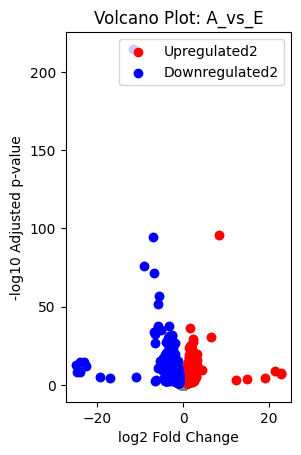

In [44]:
# clean
plt.clf()
#A_vs_E
plt.subplot(1, 2, 2)
plt.scatter(data2['log2FoldChange'], -np.log10(data2['padj']), color='gray', alpha=0.7)
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.title('Volcano Plot: A_vs_E')

# Highlight genes that are significantly up-regulated and down-regulated 
plt.scatter(upregulated_A_vs_E['log2FoldChange'], -np.log10(upregulated_A_vs_E['padj']), color='red', label='Upregulated2')
plt.scatter(downregulated_A_vs_E['log2FoldChange'], -np.log10(downregulated_A_vs_E['padj']), color='blue', label='Downregulated2')

# legend
plt.legend()

plt.savefig('volcano_plot_A_vs_E.pdf', dpi=300, bbox_inches='tight')

In [47]:
# Step4 draw the MA diagram

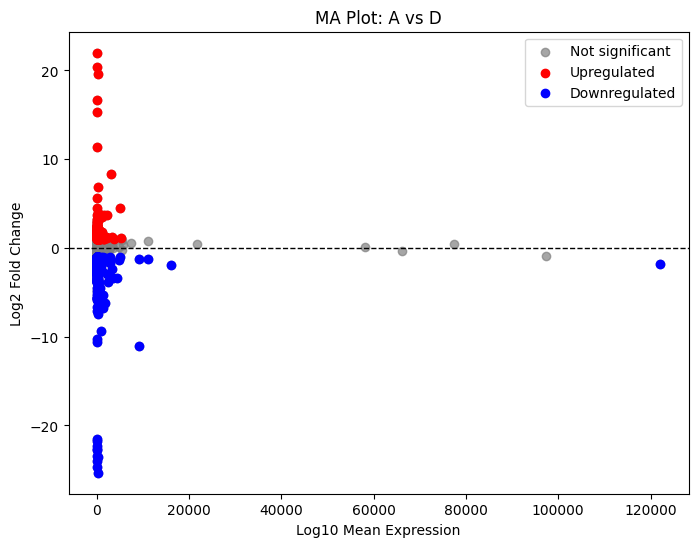

In [60]:
# Draw the MA plot of A_vs_D
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.scatter(data1["baseMean"], data1["log2FoldChange"], color="gray", alpha=0.7, label="Not significant")
axes.scatter(upregulated_A_vs_D["baseMean"], upregulated_A_vs_D["log2FoldChange"], color="red", label="Upregulated")
axes.scatter(downregulated_A_vs_D["baseMean"], downregulated_A_vs_D["log2FoldChange"], color="blue", label="Downregulated")

axes.axhline(y=0, color="black", linestyle="--", linewidth=1) # Add a guide with y=0


axes.set_xlabel("Log10 Mean Expression")
axes.set_ylabel("Log2 Fold Change")
axes.set_title("MA Plot: A vs D")
axes.legend()

plt.savefig('MA_plot_A_vs_D.pdf', dpi=300, bbox_inches='tight')  




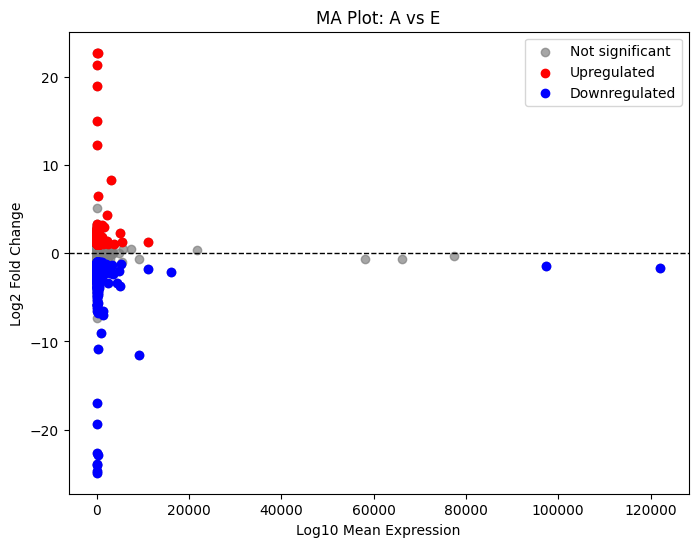

In [62]:
# Draw the MA plot of A_vs_E
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.scatter(data2["baseMean"], data2["log2FoldChange"], color="gray", alpha=0.7, label="Not significant")
axes.scatter(upregulated_A_vs_E["baseMean"], upregulated_A_vs_E["log2FoldChange"], color="red", label="Upregulated")
axes.scatter(downregulated_A_vs_E["baseMean"], downregulated_A_vs_E["log2FoldChange"], color="blue", label="Downregulated")

axes.axhline(y=0, color="black", linestyle="--", linewidth=1) # Add a guide with y=0


axes.set_xlabel("Log10 Mean Expression")
axes.set_ylabel("Log2 Fold Change")
axes.set_title("MA Plot: A vs E")
axes.legend()

plt.savefig('MA_plot_A_vs_E.pdf', dpi=300, bbox_inches='tight') 



In [63]:
# Step 5 Plot the P-value histogram
import matplotlib.pyplot as plt
# Set the threshold
pval_threshold = 0.05


plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

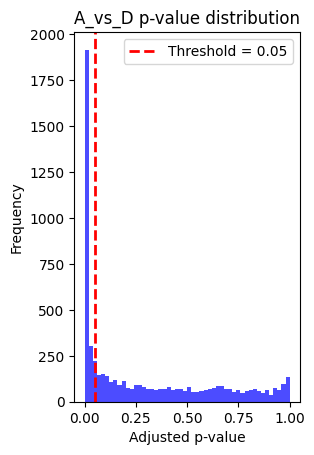

In [65]:
# A_vs_D 
plt.subplot(1, 2, 1)
plt.hist(data1['padj'].dropna(), bins=50, color='blue', alpha=0.7)
plt.axvline(pval_threshold, color='red', linestyle='dashed', linewidth=2)
plt.title("A_vs_D p-value distribution")
plt.xlabel("Adjusted p-value")
plt.ylabel("Frequency")
plt.legend(["Threshold = 0.05"])
plt.savefig('p_value_histogram_A_vs_D.pdf', dpi=300, bbox_inches='tight')

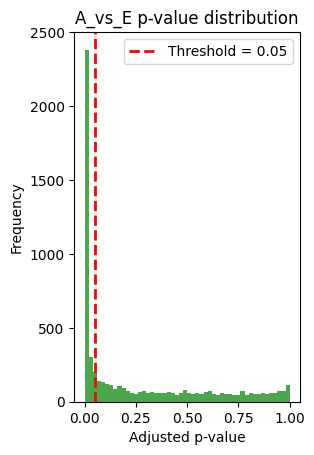

In [66]:
# A_vs_E
plt.subplot(1, 2, 2)
plt.hist(data2['padj'].dropna(), bins=50, color='green', alpha=0.7)
plt.axvline(pval_threshold, color='red', linestyle='dashed', linewidth=2)
plt.title("A_vs_E p-value distribution")
plt.xlabel("Adjusted p-value")
plt.ylabel("Frequency")
plt.legend(["Threshold = 0.05"])
plt.savefig('p_value_histogram_A_vs_E.pdf', dpi=300, bbox_inches='tight')

In [68]:
#Step 6 heatmap
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
# Extract the most differentially expressed gene (A_vs_D)
top_genes_A_vs_D = data1[(data1['padj'] < pval_threshold) & (data1['log2FoldChange'].abs() > logfc_threshold)]

In [71]:
# Expression data of the most differentially expressed gene (A_vs_D) were extracted.
expression_data_A_vs_D = top_genes_A_vs_D[['gene_id', 'baseMean']]
expression_data_A_vs_D.set_index('gene_id', inplace=True)

In [72]:
# Create a drawing window
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

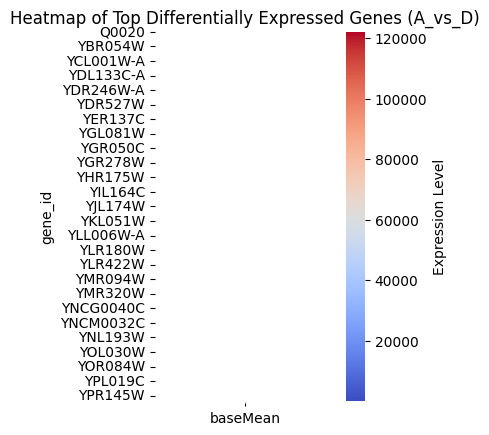

In [73]:
# A_vs_D
plt.subplot(1, 2, 1)
sns.heatmap(expression_data_A_vs_D, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Expression Level'}, linewidths=0.5)
plt.title("Heatmap of Top Differentially Expressed Genes (A_vs_D)")
plt.savefig('heatmap_A_vs_D.pdf', dpi=300, bbox_inches='tight') 

In [75]:
#Extract the most differentially expressed gene (A_vs_E)
top_genes_A_vs_E = data2[(data2['padj'] < pval_threshold) & (data2['log2FoldChange'].abs() > logfc_threshold)]

In [76]:
#Expression data of the most differentially expressed gene (A_vs_E) were extracted.
expression_data_A_vs_E = top_genes_A_vs_E[['gene_id', 'baseMean']] 
expression_data_A_vs_E.set_index('gene_id', inplace=True)

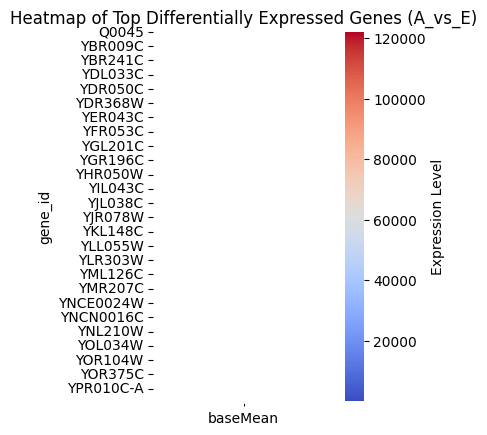

In [79]:
# A_vs_E
plt.subplot(1, 2, 2)
sns.heatmap(expression_data_A_vs_E, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Expression Level'}, linewidths=0.5)
plt.title("Heatmap of Top Differentially Expressed Genes (A_vs_E)")
plt.savefig('heatmap_A_vs_E.pdf', dpi=300, bbox_inches='tight') 